<a href="https://colab.research.google.com/github/Kayalks/Flying-High-or-Falling-Short-/blob/main/Flying_High_or_Falling_Short%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Reviews

In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, contractions
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.util import ngrams
nltk.download('stopwords')
nltk.download('punkt')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Load the CSV file into a pandas DataFrame, specifying the index column

drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/BA_analytics/BA_reviews.csv"
df = pd.read_csv(file_path, index_col=0)

import re
import string

# Function to clean text data
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Remove verification markers like "✅ Trip Verified |" and "Not Verified |"
    text = re.sub(r"(✅ Trip Verified \| |Not Verified \| )", "", text)

    # Remove special characters and punctuation except apostrophes (')
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply text cleaning to the reviews
df["cleaned_reviews"] = df["reviews"].apply(clean_text)

df_cleaned = df.copy()

Mounted at /content/drive


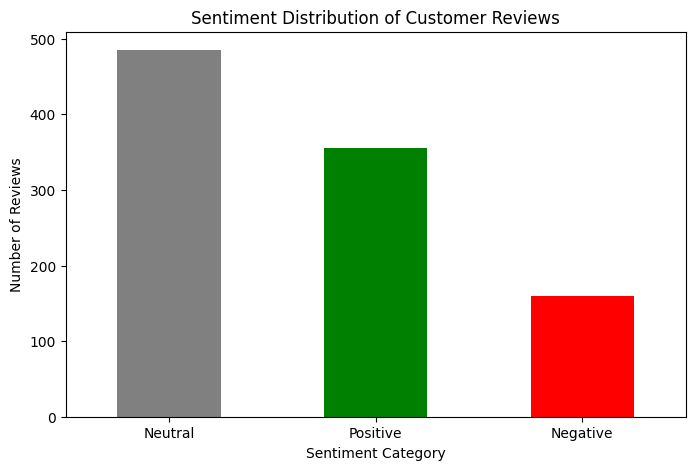

                                     cleaned_reviews  sentiment_score  \
0  first the good news the club suites are such a...         0.139035   
1  i have never travelled with british airways be...         0.328000   
2  terrible overall medium service and the flight...        -0.666667   
3  london heathrow to male in new business class ...         0.300758   
4  very good flight following an equally good fli...         0.344286   

  sentiment_label  
0        Positive  
1        Positive  
2        Negative  
3        Positive  
4        Positive  


In [ ]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to cleaned reviews
df_cleaned["sentiment_score"] = df_cleaned["cleaned_reviews"].apply(get_sentiment)

# Categorize sentiment into Positive, Neutral, and Negative
df_cleaned["sentiment_label"] = df_cleaned["sentiment_score"].apply(
    lambda score: "Positive" if score > 0.1 else ("Negative" if score < -0.1 else "Neutral")
)

# Save the sentiment analysis results
df_cleaned.to_csv("sentiment_analysis_results.csv", index=False)

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
df_cleaned["sentiment_label"].value_counts().plot(kind="bar", color=['gray', 'green', 'red'])
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

# Display the first few rows with sentiment scores
print(df_cleaned[["cleaned_reviews", "sentiment_score", "sentiment_label"]].head())


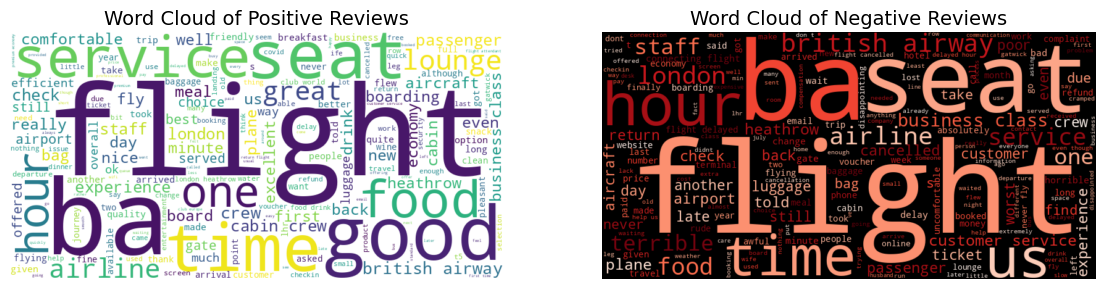

Most Frequent Words in Positive Reviews:
         Word  Frequency
0     flight        634
1         ba        421
2       good        304
3    service        251
4       crew        221
5       food        220
6       time        211
7      cabin        170
8       seat        152
9     london        149
10     staff        121
11     seats        116
12     class        116
13       one        115
14     first        113
15  business        113
16      club        109
17       get        109
18     would        108
19   british        108

Most Frequent Words in Negative Reviews:
          Word  Frequency
0      flight        214
1          ba        131
2     service         88
3          us         73
4     british         61
5      london         61
6     airways         60
7        seat         59
8     airline         57
9    customer         54
10   business         53
11      class         52
12      hours         50
13       food         49
14  cancelled         48
15       ti

In [ ]:

# Load sentiment analysis results
df = pd.read_csv("sentiment_analysis_results.csv")

# Define stopwords using nltk
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stopwords
def process_text(text):
    if not isinstance(text, str):
        return []

    words = text.lower().split()  # Convert to lowercase and split words
    words = [word for word in words if word not in stop_words]  # Remove stopwords

    return words

# Apply text processing
df["tokens"] = df["cleaned_reviews"].apply(process_text)

# Separate positive and negative reviews
positive_reviews = df[df["sentiment_label"] == "Positive"]["tokens"].explode().tolist()
negative_reviews = df[df["sentiment_label"] == "Negative"]["tokens"].explode().tolist()

# Count word frequency
positive_word_freq = Counter(positive_reviews)
negative_word_freq = Counter(negative_reviews)

# Convert to DataFrame for display
positive_word_freq_df = pd.DataFrame(positive_word_freq.most_common(20), columns=["Word", "Frequency"])
negative_word_freq_df = pd.DataFrame(negative_word_freq.most_common(20), columns=["Word", "Frequency"])

# Save word frequency tables
positive_word_freq_df.to_csv("positive_word_frequency.csv", index=False)
negative_word_freq_df.to_csv("negative_word_frequency.csv", index=False)

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(' '.join(negative_reviews))

# Plot the word clouds
plt.figure(figsize=(14, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Positive Reviews", fontsize=14)

# Negative Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Negative Reviews", fontsize=14)

plt.show()

# Display most common words
print("Most Frequent Words in Positive Reviews:\n", positive_word_freq_df)
print("\nMost Frequent Words in Negative Reviews:\n", negative_word_freq_df)


Aspect-Based Sentiment Analysis Results:
           staff  service  flight  food  seating  check-in  delay  comfort  \
Neutral     731      760     582   767      840       874    924      890   
Positive    215      169     298   184      120       100     40       77   
Negative     54       71     120    49       40        26     36       33   

          entertainment  
Neutral             920  
Positive             68  
Negative             12  


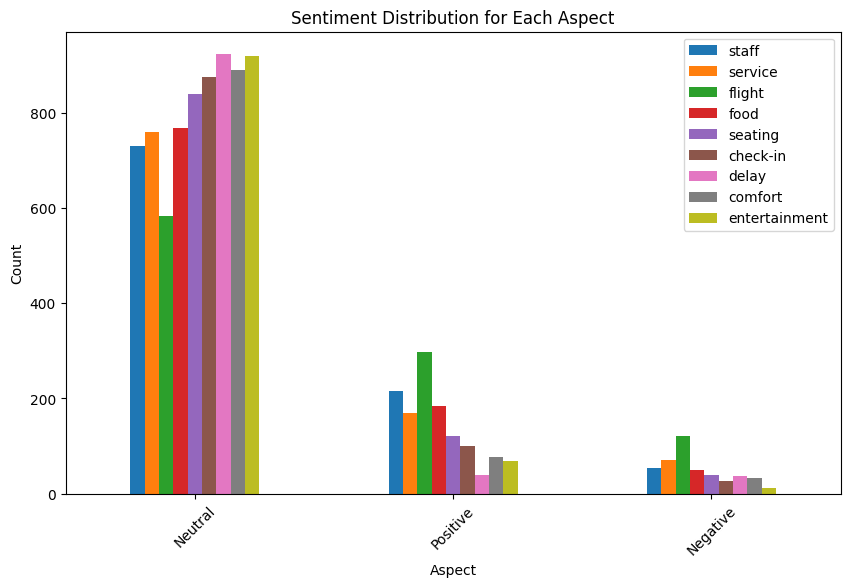

In [ ]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt

# Load sentiment analysis results
df = pd.read_csv("sentiment_analysis_results.csv")

# Define aspect mapping (synonyms grouped into main aspects)
aspect_mapping = {
    "staff": ["cabin crew", "crew", "crew members", "ground staff"],
    "service": ["customer service", "support", "assistance"],
    "flight": ["aircraft", "plane", "flight experience"],
    "food": ["meal", "meals", "catering"],
    "seating": ["seat", "seats", "legroom", "space"],
    "check-in": ["checkin", "boarding process", "boarding"],
    "delay": ["delayed", "late departure", "late arrival"],
    "comfort": ["amenities", "experience"],
    "entertainment": ["movies", "screens", "inflight entertainment", "wifi"]
}

# Function to normalize aspect terms in a review
def normalize_aspects(text):
    if not isinstance(text, str):
        return text

    text = text.lower()  # Convert to lowercase
    for aspect, synonyms in aspect_mapping.items():
        for synonym in synonyms:
            text = text.replace(synonym, aspect)  # Replace synonyms with main aspect name
    return text

# Apply aspect normalization to reviews
df["normalized_reviews"] = df["cleaned_reviews"].apply(normalize_aspects)

# Function to extract aspect-related sentences
def extract_aspect_sentences(review, aspect):
    sentences = review.split(".")
    aspect_sentences = [sentence.strip() for sentence in sentences if re.search(rf"\b{aspect}\b", sentence, re.IGNORECASE)]
    return " | ".join(aspect_sentences) if aspect_sentences else None

# Create a dataframe to store aspect-level sentiment
aspect_data = []

for aspect in aspect_mapping.keys():  # Use main aspect names
    df[aspect] = df["normalized_reviews"].apply(lambda review: extract_aspect_sentences(str(review), aspect))

    # Perform sentiment analysis on extracted sentences
    df[f"{aspect}_sentiment"] = df[aspect].apply(lambda x: TextBlob(str(x)).sentiment.polarity if x else 0.0)

    # Categorize sentiment
    df[f"{aspect}_label"] = df[f"{aspect}_sentiment"].apply(
        lambda score: "Positive" if score > 0.1 else ("Negative" if score < -0.1 else "Neutral")
    )

    # Collect aggregated results for visualization
    aspect_data.append(df[f"{aspect}_label"].value_counts().rename(aspect))

# Convert aspect sentiment results to a DataFrame
aspect_sentiment_df = pd.DataFrame(aspect_data).T.fillna(0)

# Save aspect-based sentiment results
df.to_csv("aspect_sentiment_results.csv", index=False)

# Display aspect sentiment analysis results
print("Aspect-Based Sentiment Analysis Results:\n", aspect_sentiment_df)

# Plot sentiment distribution per aspect
aspect_sentiment_df.plot(kind="bar", figsize=(10, 6), title="Sentiment Distribution for Each Aspect")
plt.xlabel("Aspect")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Positive Bigrams:
                Bigram  Frequency
0     british airways         98
1          cabin crew         86
2      business class         75
3          club world         34
4     london heathrow         32
5          first time         24
6    customer service         24
7         club europe         24
8     premium economy         23
9       return flight         22
10        first class         20
11        good flight         18
12          food good         18
13       ground staff         17
14  flight attendants         17
15       meal service         16
16         food drink         16
17         via london         16
18        food drinks         15
19        hour flight         15

Top Negative Bigrams:
                Bigram  Frequency
0     british airways         59
1      business class         42
2    customer service         39
3   connecting flight         20
4      flight delayed         19
5           never fly         13
6    flight cancelled        

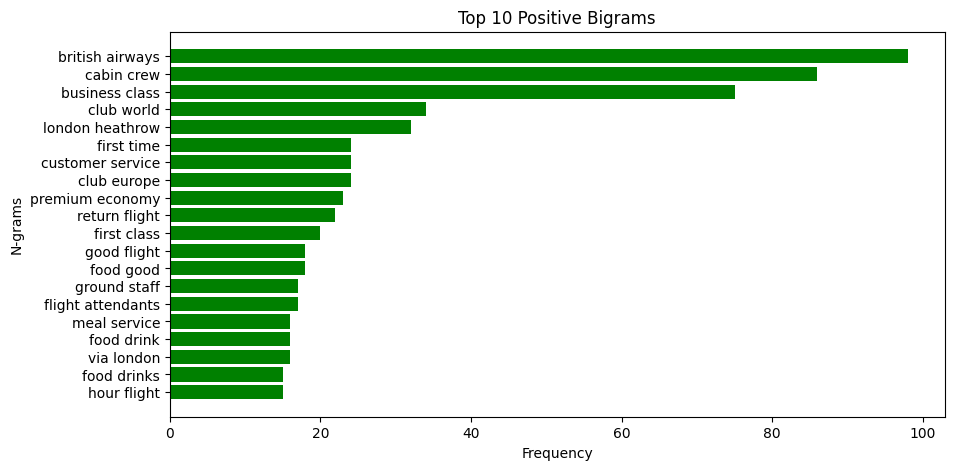

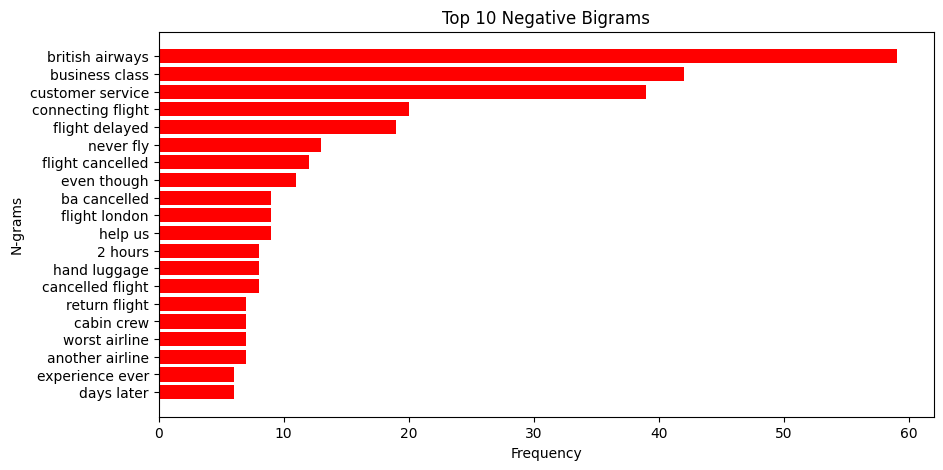

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


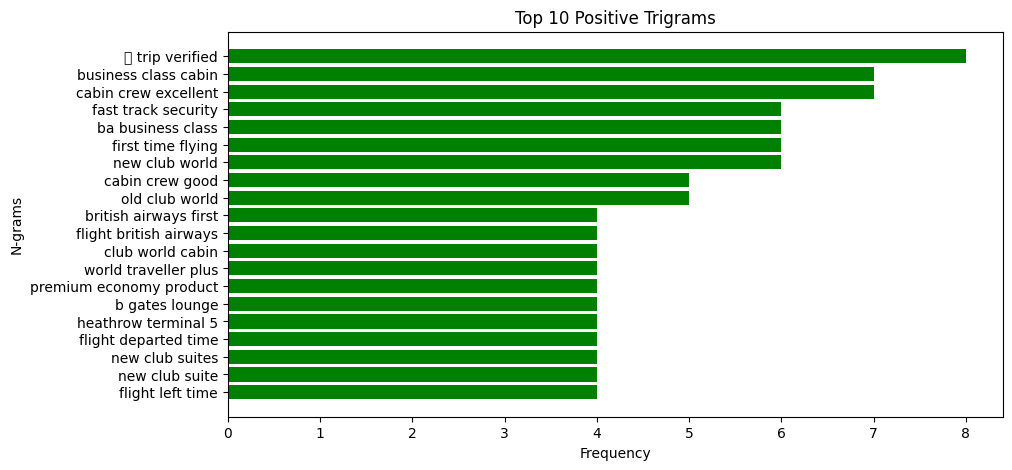

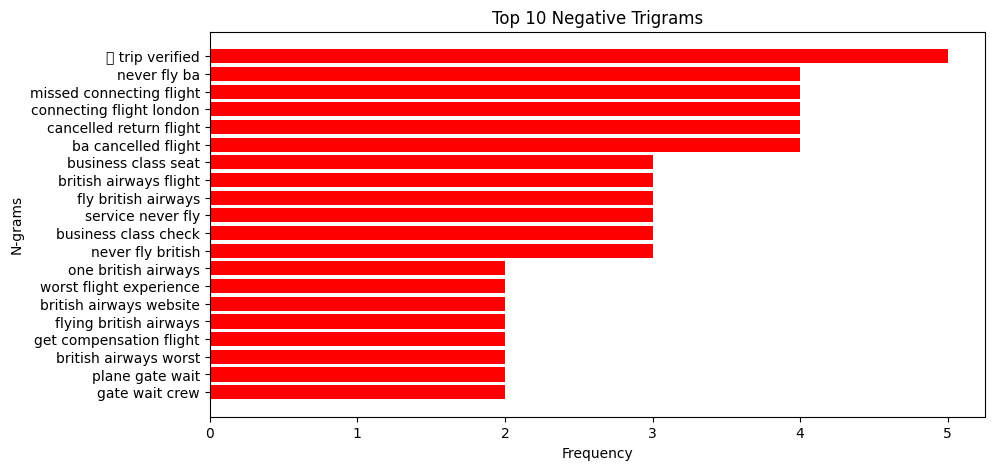

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

# Download stopwords (only needed once)
nltk.download('stopwords')

# Load sentiment analysis results
df = pd.read_csv("sentiment_analysis_results.csv")

# Define stopwords using nltk
stop_words = set(stopwords.words('english'))

# Function to tokenize text and remove stopwords
def process_text(text):
    if not isinstance(text, str):
        return []

    words = text.lower().split()  # Convert to lowercase and split words
    words = [word for word in words if word not in stop_words]  # Remove stopwords

    return words

# Apply text processing
df["tokens"] = df["cleaned_reviews"].apply(process_text)

# Function to extract bigrams and trigrams
def extract_ngrams(token_list, n):
    return [' '.join(gram) for gram in ngrams(token_list, n)]

# Extract bigrams & trigrams for positive reviews
positive_reviews = df[df["sentiment_label"] == "Positive"]["tokens"].tolist()
positive_bigrams = Counter([bigram for review in positive_reviews for bigram in extract_ngrams(review, 2)])
positive_trigrams = Counter([trigram for review in positive_reviews for trigram in extract_ngrams(review, 3)])

# Extract bigrams & trigrams for negative reviews
negative_reviews = df[df["sentiment_label"] == "Negative"]["tokens"].tolist()
negative_bigrams = Counter([bigram for review in negative_reviews for bigram in extract_ngrams(review, 2)])
negative_trigrams = Counter([trigram for review in negative_reviews for trigram in extract_ngrams(review, 3)])

# Convert to DataFrame for display
positive_bigrams_df = pd.DataFrame(positive_bigrams.most_common(20), columns=["Bigram", "Frequency"])
negative_bigrams_df = pd.DataFrame(negative_bigrams.most_common(20), columns=["Bigram", "Frequency"])
positive_trigrams_df = pd.DataFrame(positive_trigrams.most_common(20), columns=["Trigram", "Frequency"])
negative_trigrams_df = pd.DataFrame(negative_trigrams.most_common(20), columns=["Trigram", "Frequency"])

# Save results
positive_bigrams_df.to_csv("positive_bigrams.csv", index=False)
negative_bigrams_df.to_csv("negative_bigrams.csv", index=False)
positive_trigrams_df.to_csv("positive_trigrams.csv", index=False)
negative_trigrams_df.to_csv("negative_trigrams.csv", index=False)

# Display top bigrams and trigrams
print("Top Positive Bigrams:\n", positive_bigrams_df)
print("\nTop Negative Bigrams:\n", negative_bigrams_df)
print("\nTop Positive Trigrams:\n", positive_trigrams_df)
print("\nTop Negative Trigrams:\n", negative_trigrams_df)

# Function to plot bigram and trigram frequency
def plot_ngrams(df, title, color):
    plt.figure(figsize=(10, 5))
    plt.barh(df["Bigram" if "Bigram" in df.columns else "Trigram"], df["Frequency"], color=color)
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Plot Top Bigrams
plot_ngrams(positive_bigrams_df, "Top 10 Positive Bigrams", "green")
plot_ngrams(negative_bigrams_df, "Top 10 Negative Bigrams", "red")

# Plot Top Trigrams
plot_ngrams(positive_trigrams_df, "Top 10 Positive Trigrams", "green")
plot_ngrams(negative_trigrams_df, "Top 10 Negative Trigrams", "red")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Positive Bigrams:
                Bigram  Frequency
0     british airways         98
1          cabin crew         86
2      business class         75
3          club world         34
4     london heathrow         32
5          first time         24
6         club europe         24
7     premium economy         23
8       return flight         22
9         first class         20
10        good flight         18
11          food good         18
12       ground staff         17
13  flight attendants         17
14       meal service         16
15         food drink         16
16         via london         16
17        food drinks         15
18        hour flight         15
19          flight ba         15

Top Negative Bigrams:
                Bigram  Frequency
0     british airways         59
1      business class         42
2   connecting flight         20
3      flight delayed         19
4           never fly         13
5    flight cancelled         12
6         even though        

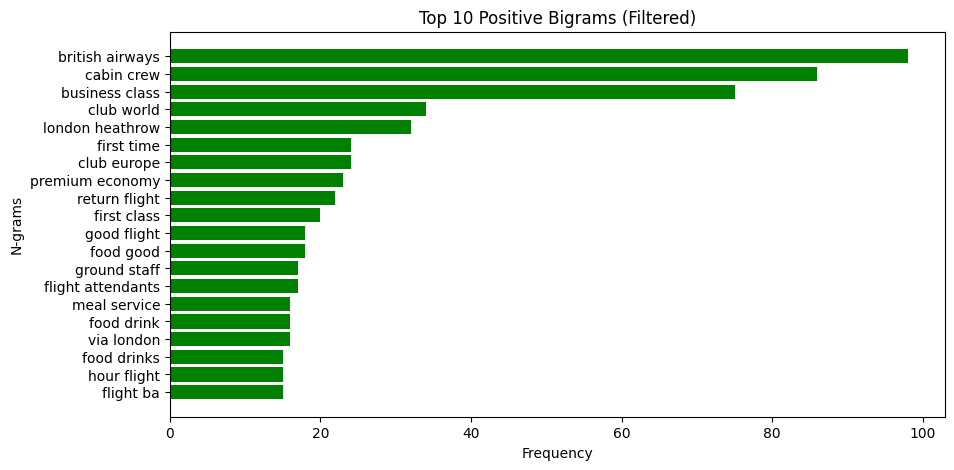

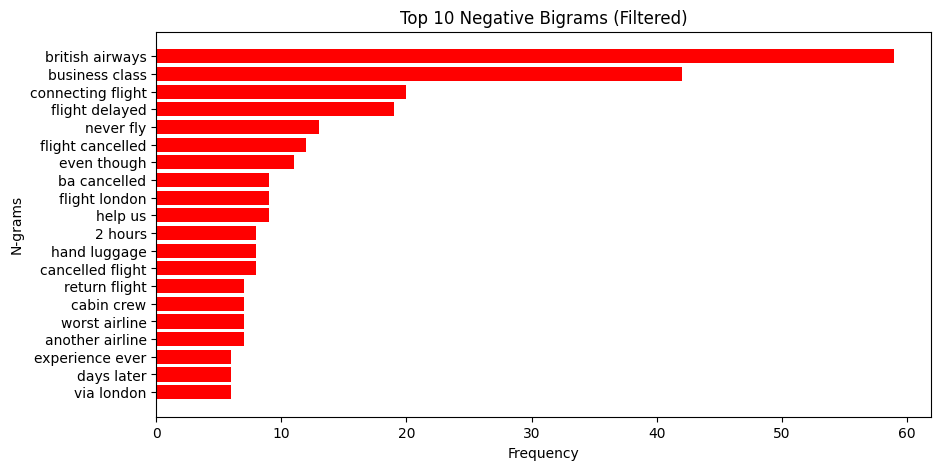

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


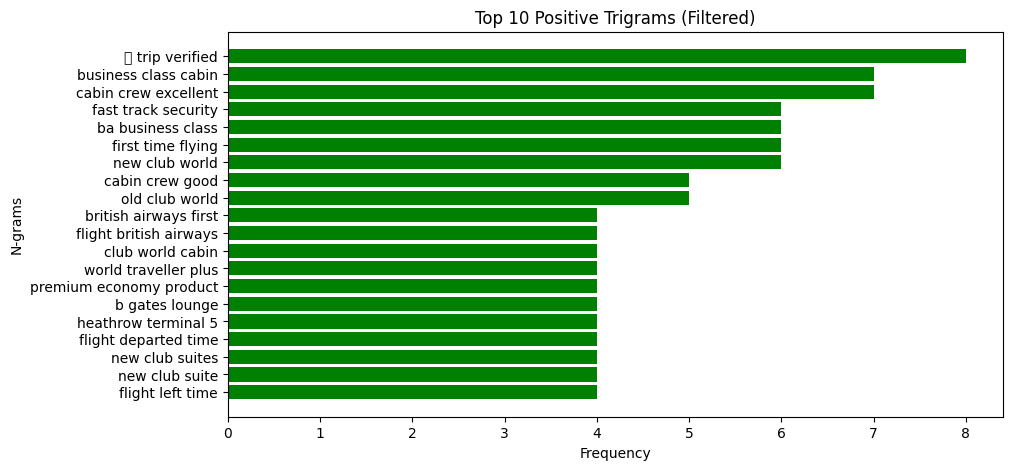

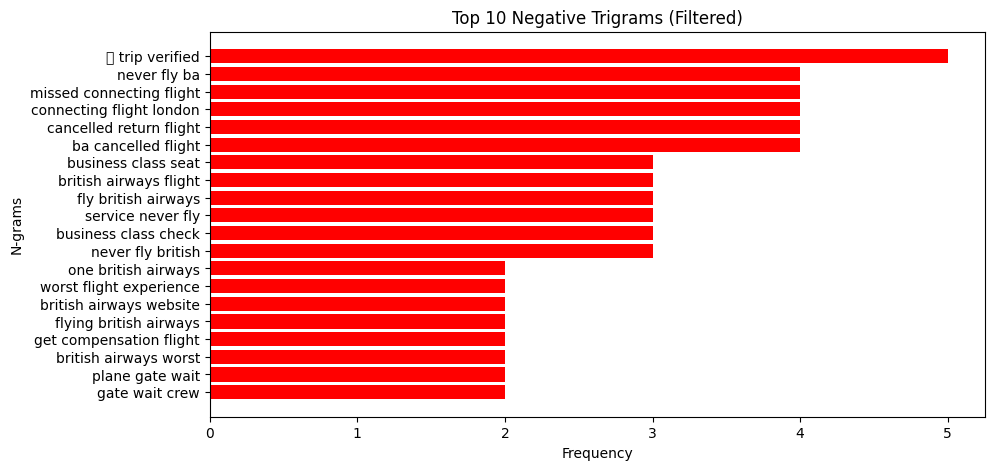

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

# Download stopwords (only needed once)
nltk.download('stopwords')

# Load sentiment analysis results
df = pd.read_csv("sentiment_analysis_results.csv")

# Define stopwords using nltk
stop_words = set(stopwords.words('english'))

# Define phrases to exclude (common uninformative bigrams/trigrams)
exclude_phrases = set([
    "flight was", "staff was", "service was", "it was", "they were",
    "i was", "we were", "customer service", "food was", "check in",
    "it is", "they are", "seats were", "experience was"
])

# Function to tokenize and remove stopwords
def process_text(text):
    if not isinstance(text, str):
        return []

    words = text.lower().split()  # Convert to lowercase and split words
    words = [word for word in words if word not in stop_words]  # Remove stopwords

    return words

# Apply text processing
df["tokens"] = df["cleaned_reviews"].apply(process_text)

# Function to extract bigrams and trigrams while filtering out uninformative ones
def extract_filtered_ngrams(token_list, n):
    ngram_list = [' '.join(gram) for gram in ngrams(token_list, n)]
    return [phrase for phrase in ngram_list if phrase not in exclude_phrases]

# Extract bigrams & trigrams for positive reviews
positive_reviews = df[df["sentiment_label"] == "Positive"]["tokens"].tolist()
positive_bigrams = Counter([bigram for review in positive_reviews for bigram in extract_filtered_ngrams(review, 2)])
positive_trigrams = Counter([trigram for review in positive_reviews for trigram in extract_filtered_ngrams(review, 3)])

# Extract bigrams & trigrams for negative reviews
negative_reviews = df[df["sentiment_label"] == "Negative"]["tokens"].tolist()
negative_bigrams = Counter([bigram for review in negative_reviews for bigram in extract_filtered_ngrams(review, 2)])
negative_trigrams = Counter([trigram for review in negative_reviews for trigram in extract_filtered_ngrams(review, 3)])

# Convert to DataFrame for display
positive_bigrams_df = pd.DataFrame(positive_bigrams.most_common(20), columns=["Bigram", "Frequency"])
negative_bigrams_df = pd.DataFrame(negative_bigrams.most_common(20), columns=["Bigram", "Frequency"])
positive_trigrams_df = pd.DataFrame(positive_trigrams.most_common(20), columns=["Trigram", "Frequency"])
negative_trigrams_df = pd.DataFrame(negative_trigrams.most_common(20), columns=["Trigram", "Frequency"])

# Save results
positive_bigrams_df.to_csv("positive_bigrams_filtered.csv", index=False)
negative_bigrams_df.to_csv("negative_bigrams_filtered.csv", index=False)
positive_trigrams_df.to_csv("positive_trigrams_filtered.csv", index=False)
negative_trigrams_df.to_csv("negative_trigrams_filtered.csv", index=False)

# Display top bigrams and trigrams
print("Top Positive Bigrams:\n", positive_bigrams_df)
print("\nTop Negative Bigrams:\n", negative_bigrams_df)
print("\nTop Positive Trigrams:\n", positive_trigrams_df)
print("\nTop Negative Trigrams:\n", negative_trigrams_df)

# Function to plot bigram and trigram frequency
def plot_ngrams(df, title, color):
    plt.figure(figsize=(10, 5))
    plt.barh(df["Bigram" if "Bigram" in df.columns else "Trigram"], df["Frequency"], color=color)
    plt.xlabel("Frequency")
    plt.ylabel("N-grams")
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Plot Top Bigrams
plot_ngrams(positive_bigrams_df, "Top 10 Positive Bigrams (Filtered)", "green")
plot_ngrams(negative_bigrams_df, "Top 10 Negative Bigrams (Filtered)", "red")

# Plot Top Trigrams
plot_ngrams(positive_trigrams_df, "Top 10 Positive Trigrams (Filtered)", "green")
plot_ngrams(negative_trigrams_df, "Top 10 Negative Trigrams (Filtered)", "red")


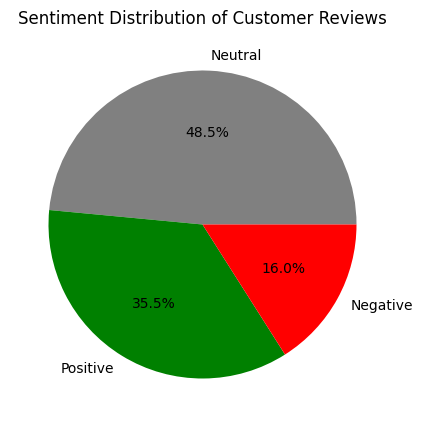

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the datasets
df_sentiment = pd.read_csv("sentiment_analysis_results.csv")
df_aspect = pd.read_csv("aspect_sentiment_results.csv")
positive_bigrams_df = pd.read_csv("positive_bigrams_filtered.csv")
negative_bigrams_df = pd.read_csv("negative_bigrams_filtered.csv")
positive_trigrams_df = pd.read_csv("positive_trigrams_filtered.csv")
negative_trigrams_df = pd.read_csv("negative_trigrams_filtered.csv")

# ✅ Sentiment Distribution (Pie Chart)
plt.figure(figsize=(5, 5))
df_sentiment["sentiment_label"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=['gray', 'green', 'red'])
plt.title("Sentiment Distribution of Customer Reviews")
plt.ylabel("")  # Hide y-axis label
plt.savefig("sentiment_distribution.png")  # Save for PowerPoint
plt.show()



In [ ]:
# ✅ Fix: Exclude non-aspect columns before processing
aspect_columns = [col for col in df_aspect.columns if "_label" in col and col != "sentiment_label"]

# Count occurrences of Negative sentiment per aspect
aspect_negative_counts = {col.replace("_label", ""): (df_aspect[col] == "Negative").sum() for col in aspect_columns}
aspect_positive_counts = {col.replace("_label", ""): (df_aspect[col] == "Positive").sum() for col in aspect_columns}

# Convert to DataFrame
aspect_negative_df = pd.DataFrame.from_dict(aspect_negative_counts, orient='index', columns=["Negative Mentions"]).sort_values(by="Negative Mentions", ascending=False)
aspect_positive_df = pd.DataFrame.from_dict(aspect_positive_counts, orient='index', columns=["Positive Mentions"]).sort_values(by="Positive Mentions", ascending=False)


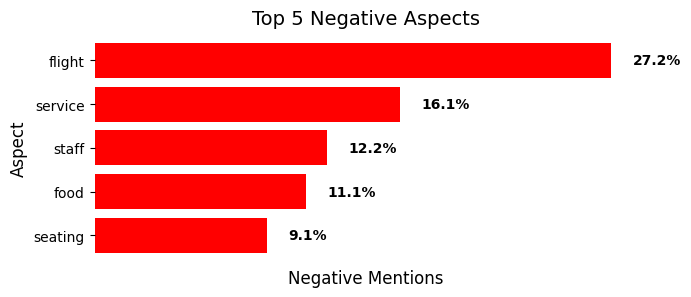

In [ ]:
import matplotlib.pyplot as plt

# Calculate total negative mentions
total_negatives = aspect_negative_df["Negative Mentions"].sum()

# Calculate percentage for each aspect
aspect_negative_df["Negative %"] = (aspect_negative_df["Negative Mentions"] / total_negatives) * 100

# ✅ Top Negative Aspects (Clean Chart with % outside bars)
plt.figure(figsize=(7,3))
bars = plt.barh(aspect_negative_df.index[:5], aspect_negative_df["Negative Mentions"][:5], color="red")

# Remove all borders (spines)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

# Add percentage labels OUTSIDE the bars
for bar, percent in zip(bars, aspect_negative_df["Negative %"][:5]):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f"{percent:.1f}%",
             va='center', ha='left', fontsize=10, color="black", fontweight="bold")

plt.xlabel("Negative Mentions", fontsize=12)
plt.ylabel("Aspect", fontsize=12)
plt.title("Top 5 Negative Aspects", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xticks([])  # Remove x-axis ticks for a cleaner look
plt.savefig("top_negative_aspects_no_borders.png", bbox_inches='tight')  # Save for PowerPoint
plt.show()


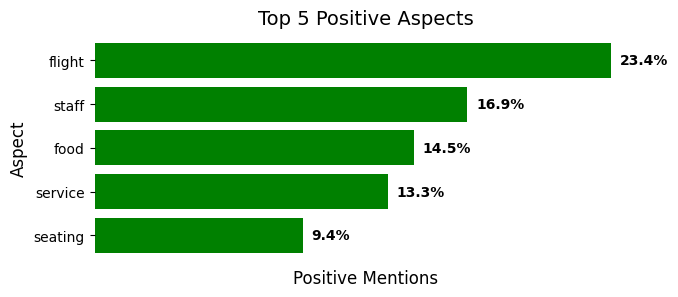

In [ ]:
import matplotlib.pyplot as plt

# Calculate total positive mentions
total_positives = aspect_positive_df["Positive Mentions"].sum()

# Calculate percentage for each aspect
aspect_positive_df["Positive %"] = (aspect_positive_df["Positive Mentions"] / total_positives) * 100

# ✅ Top Positive Aspects (Clean Chart with % outside bars)
plt.figure(figsize=(7,3))
bars = plt.barh(aspect_positive_df.index[:5], aspect_positive_df["Positive Mentions"][:5], color="green")

# Remove all borders (spines)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

# Add percentage labels OUTSIDE the bars
for bar, percent in zip(bars, aspect_positive_df["Positive %"][:5]):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, f"{percent:.1f}%",
             va='center', ha='left', fontsize=10, color="black", fontweight="bold")

plt.xlabel("Positive Mentions", fontsize=12)
plt.ylabel("Aspect", fontsize=12)
plt.title("Top 5 Positive Aspects", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.xticks([])  # Remove x-axis ticks for a cleaner look
plt.savefig("top_positive_aspects_no_borders.png", bbox_inches='tight')  # Save for PowerPoint
plt.show()


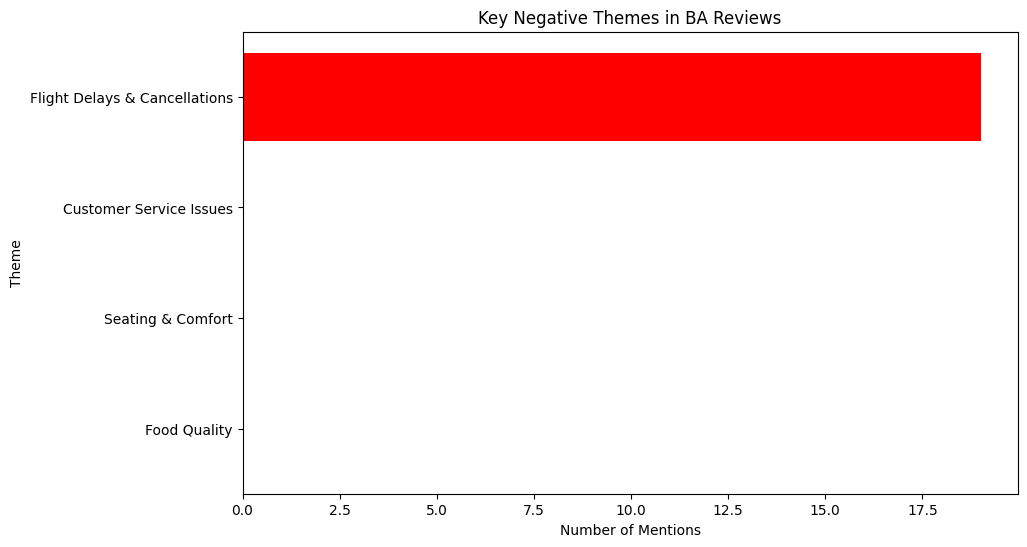

In [ ]:
import matplotlib.pyplot as plt

# ✅ Define Key Themes for Negative Phrases
negative_themes = {
    "Flight Delays & Cancellations": ["flight delayed", "long wait time", "missed connection"],
    "Customer Service Issues": ["staff was rude", "customer service unhelpful", "no response"],
    "Seating & Comfort": ["seats uncomfortable", "legroom too small", "cramped space"],
    "Food Quality": ["food was bad", "meal was cold", "no vegetarian option"]
}

# ✅ Count occurrences of phrases within each theme
negative_theme_counts = {theme: 0 for theme in negative_themes}

for theme, phrases in negative_themes.items():
    for phrase in phrases:
        if phrase in negative_bigrams_df["Bigram"].values:
            negative_theme_counts[theme] += negative_bigrams_df.loc[negative_bigrams_df["Bigram"] == phrase, "Frequency"].values[0]

# ✅ Convert to DataFrame
negative_theme_df = pd.DataFrame.from_dict(negative_theme_counts, orient='index', columns=["Frequency"]).sort_values(by="Frequency", ascending=False)

# ✅ Plot Negative Themes as a Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(negative_theme_df.index, negative_theme_df["Frequency"], color="red")
plt.xlabel("Number of Mentions")
plt.ylabel("Theme")
plt.title("Key Negative Themes in BA Reviews")
plt.gca().invert_yaxis()
plt.savefig("negative_themes_chart.png", bbox_inches='tight', dpi=300)
plt.show()


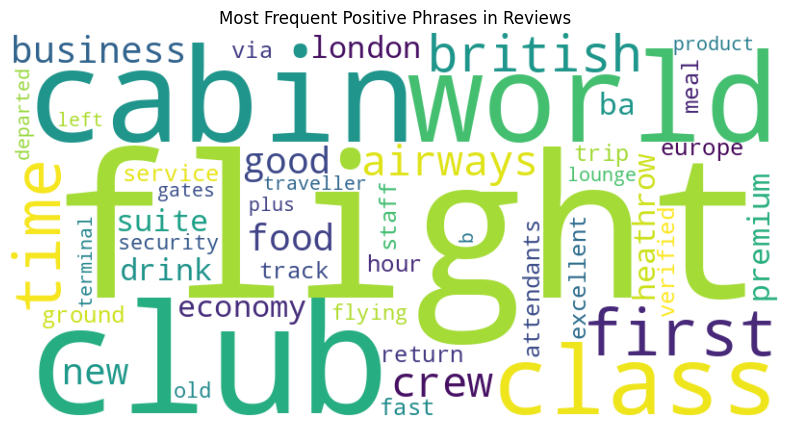

In [ ]:
# ✅ Common Positive Phrases (Word Cloud)
positive_phrases = ' '.join(positive_bigrams_df["Bigram"].tolist() + positive_trigrams_df["Trigram"].tolist())
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_phrases)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Positive Phrases in Reviews")
plt.savefig("positive_wordcloud.png")  # Save for PowerPoint
plt.show()


# Customer holidays

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Load the dataset
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/BA_analytics/customer_booking.csv"
#df = pd.read_csv(file_path, index_col=0)
df = pd.read_csv(file_path,encoding='ISO-8859-1')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
# ✅ Step 1: Handle Missing Values
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [ ]:
# ✅ Step 1: Identify Categorical and Numerical Columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# ✅ Step 2: Encoding Categorical Variables (Using Label Encoding)
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future reference

# ✅ Step 4: Save the cleaned dataset
df.to_csv("cleaned_customer_booking.csv", index=False)



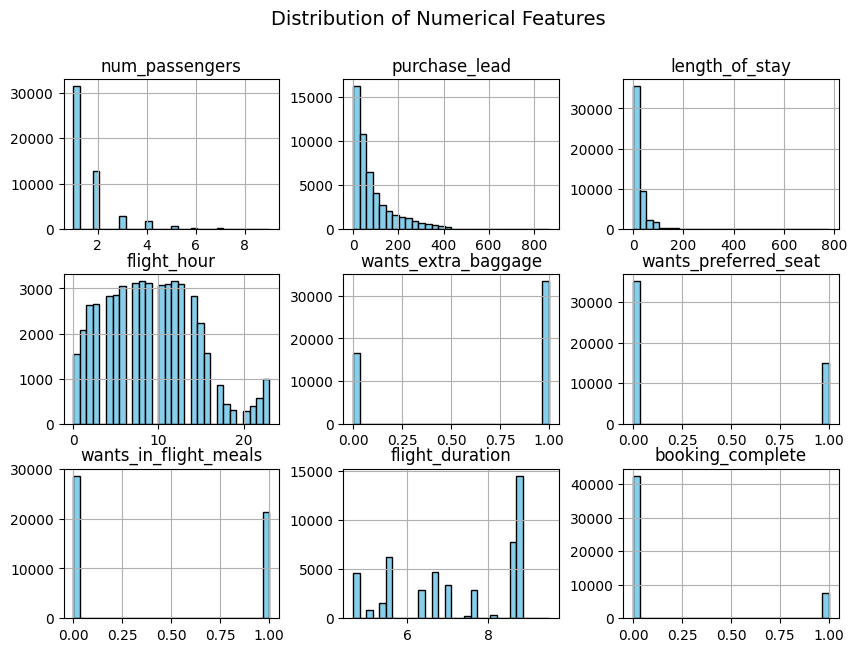

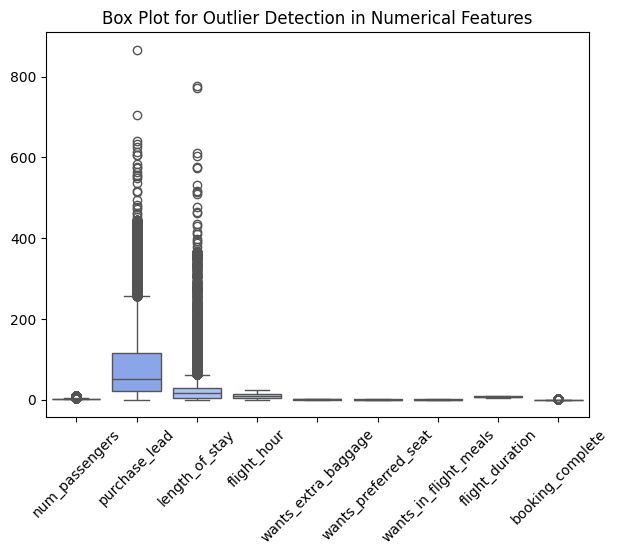

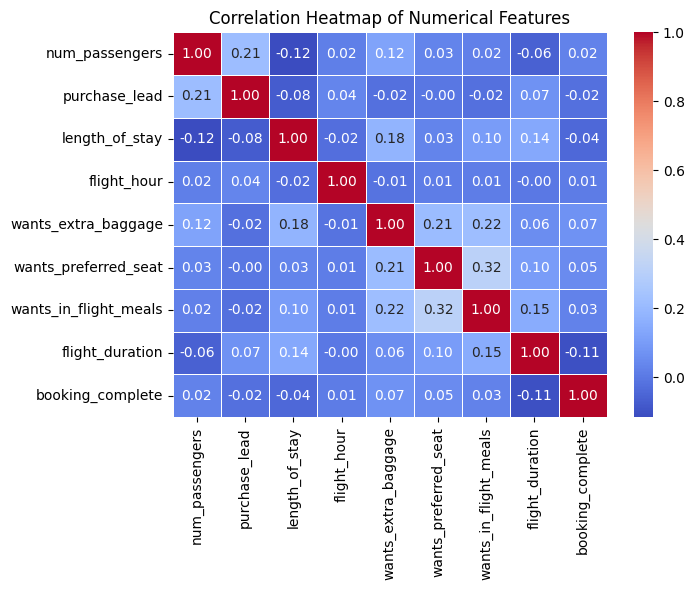

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# ✅ 1. Select Only Numerical Columns
df_numerical = df[numerical_cols]

# ✅ 2. Histograms for Numerical Features
df_numerical.hist(figsize=(10,7), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.savefig("numerical_histograms.png", bbox_inches='tight')
plt.show()

# ✅ 3. Box Plot for Outlier Detection
plt.figure(figsize=(7,5))
sns.boxplot(data=df_numerical, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection in Numerical Features")
plt.savefig("boxplot_outliers.png", bbox_inches='tight')
plt.show()

# ✅ 4. Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig("correlation_heatmap.png", bbox_inches='tight')
plt.show()

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [ ]:
df_transform = df.copy()
df_transform.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [ ]:
# ✅ 1. Log Transformation for `purchase_lead`
df_transform["purchase_lead"] = np.log1p(df_transform["purchase_lead"])  # log1p(x) = log(x+1) to avoid log(0)

# ✅ 2. Cleaning Binary Variables (Ensuring Only 0/1 Values)
binary_features = ["wants_extra_baggage", "wants_preferred_seat", "wants_in_flight_meals"]

for col in binary_features:
    df_transform = df_transform[df_transform[col].isin([0, 1])]  # Remove rows where values are not 0 or 1


df_transform.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,5.572154,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,4.727388,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,5.497168,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,4.574711,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,4.234107,22,15,6,0,36,1,0,1,5.52,0


<ipython-input-28-42165e2cba9f>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


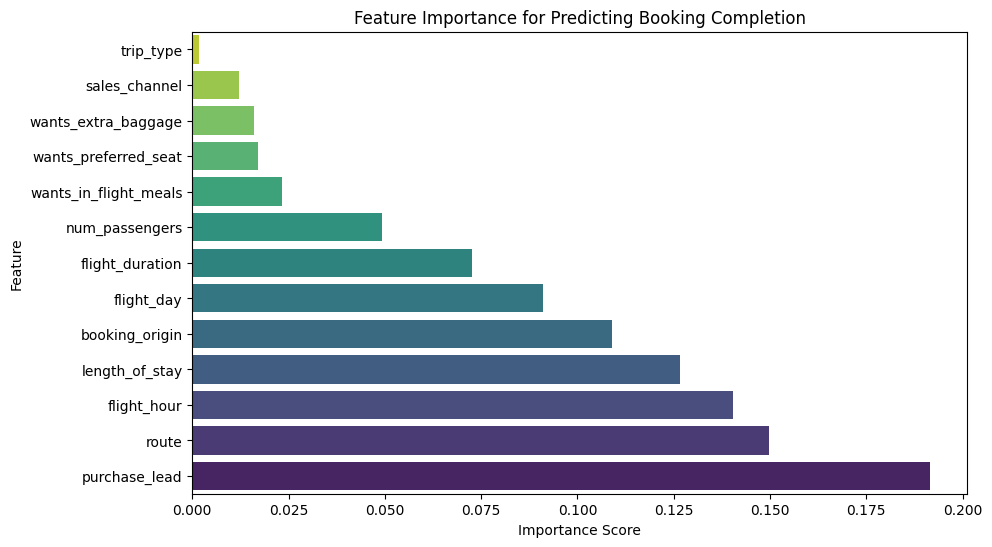

📌 Accuracy: 0.8448
📌 AUC-ROC Score: 0.7436

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     12757
           1       0.44      0.14      0.21      2243

    accuracy                           0.84     15000
   macro avg       0.65      0.55      0.56     15000
weighted avg       0.80      0.84      0.81     15000



In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from imblearn.over_sampling import SMOTE

#  Define Features and Target
target = "booking_complete"
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# ✅ 4. Train a Random Forest Model for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ✅ 5. Get Feature Importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# ✅ 4. Train a Random Forest Model for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ✅ 5. Get Feature Importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# ✅ 6. Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Predicting Booking Completion")
plt.gca().invert_yaxis()
plt.savefig("feature_importance.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 7. Train a Final Random Forest Model Using Top Features
top_features = feature_importance["Feature"].head(5).tolist()  # Select Top 5 Features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

rf_final = RandomForestClassifier(n_estimators=200, random_state=42)
rf_final.fit(X_train_selected, y_train)

# ✅ 8. Model Evaluation
y_pred = rf_final.predict(X_test_selected)
y_pred_prob = rf_final.predict_proba(X_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
classification_rep = classification_report(y_test, y_pred)

# ✅ 9. Display Results
print(f"📌 Accuracy: {accuracy:.4f}")
print(f"📌 AUC-ROC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_rep)



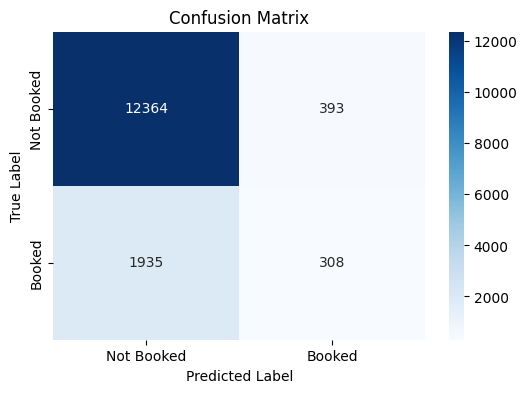

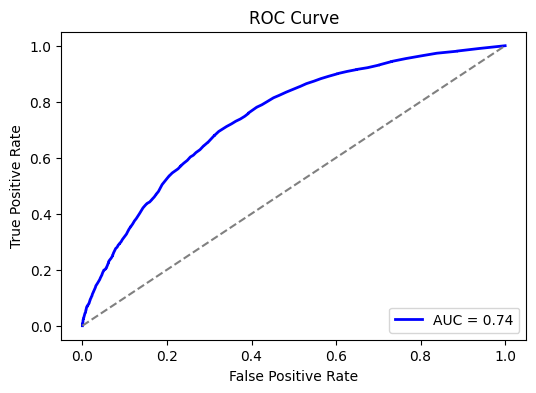

In [ ]:

from sklearn.metrics import confusion_matrix, roc_curve, auc

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
plt.show()


In [ ]:
# prompt: find the count of record for each class. booking_complete is the target.

print(df['booking_complete'].value_counts())


booking_complete
0    42522
1     7478
Name: count, dtype: int64


booking_complete
0    42522
1     7478
Name: count, dtype: int64


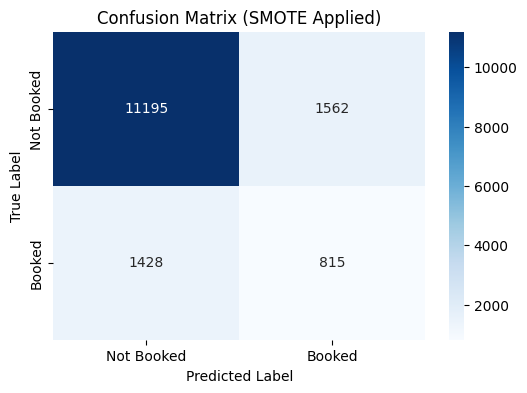

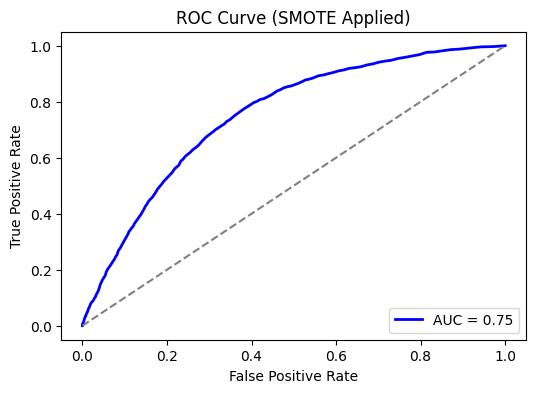

📌 Accuracy (SMOTE): 0.8007
📌 AUC-ROC Score (SMOTE): 0.7505

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     12757
           1       0.34      0.36      0.35      2243

    accuracy                           0.80     15000
   macro avg       0.61      0.62      0.62     15000
weighted avg       0.81      0.80      0.80     15000



In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 2. Define Features and Target
target = "booking_complete"
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# ✅ 3. Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ 4. Apply SMOTE to Balance the Dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ✅ 5. Train a Random Forest Model on SMOTE Data
rf_smote = RandomForestClassifier(n_estimators=200, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# ✅ 6. Model Evaluation
y_pred_smote = rf_smote.predict(X_test)
y_pred_prob_smote = rf_smote.predict_proba(X_test)[:, 1]

accuracy_smote = accuracy_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_prob_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)

# ✅ 7. Confusion Matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SMOTE Applied)")
plt.savefig("confusion_matrix_smote.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 8. ROC Curve
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

plt.figure(figsize=(6, 4))
plt.plot(fpr_smote, tpr_smote, color="blue", lw=2, label=f"AUC = {roc_auc_smote:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SMOTE Applied)")
plt.legend(loc="lower right")
plt.savefig("roc_curve_smote.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 9. Display Key Performance Metrics
print(f"📌 Accuracy (SMOTE): {accuracy_smote:.4f}")
print(f"📌 AUC-ROC Score (SMOTE): {roc_auc_smote:.4f}")
print("\nClassification Report (SMOTE):\n", classification_rep_smote)


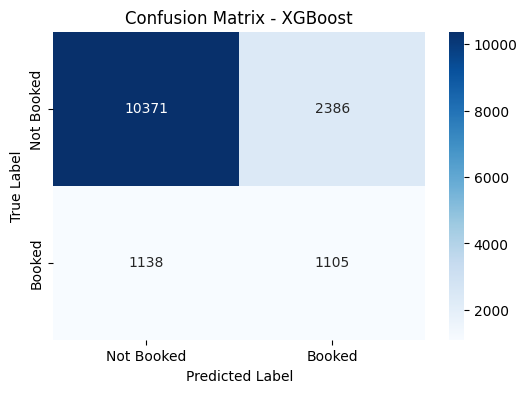

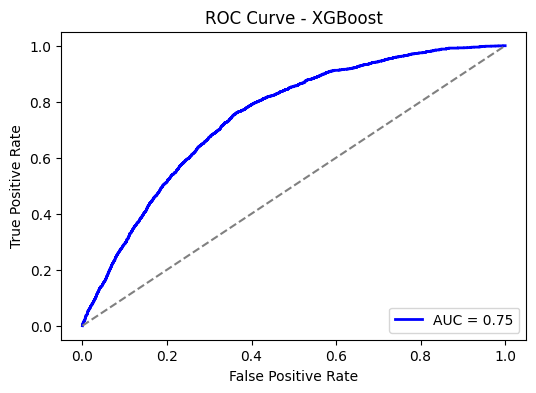

📌 XGBoost Accuracy: 0.7651
📌 XGBoost AUC-ROC Score: 0.7476

Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85     12757
           1       0.32      0.49      0.39      2243

    accuracy                           0.77     15000
   macro avg       0.61      0.65      0.62     15000
weighted avg       0.81      0.77      0.78     15000



In [ ]:
import xgboost as xgb
# ✅ 5. Train XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]),
    random_state=42
)

xgb_model.fit(X_train_smote, y_train_smote)

# ✅ 6. Model Evaluation
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# ✅ 7. Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.savefig("confusion_matrix_xgb.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 8. ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color="blue", lw=2, label=f"AUC = {roc_auc_xgb:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.savefig("roc_curve_xgb.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 9. Display Key Performance Metrics
print(f"📌 XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"📌 XGBoost AUC-ROC Score: {roc_auc_xgb:.4f}")
print("\nClassification Report - XGBoost:\n", classification_rep_xgb)

In [ ]:
from sklearn.model_selection import  GridSearchCV

Fitting 3 folds for each of 243 candidates, totalling 729 fits
📌 Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.7}


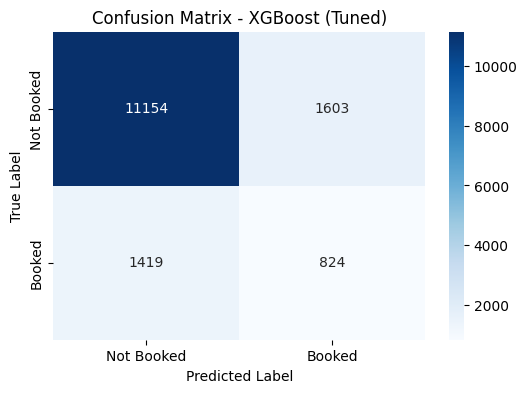

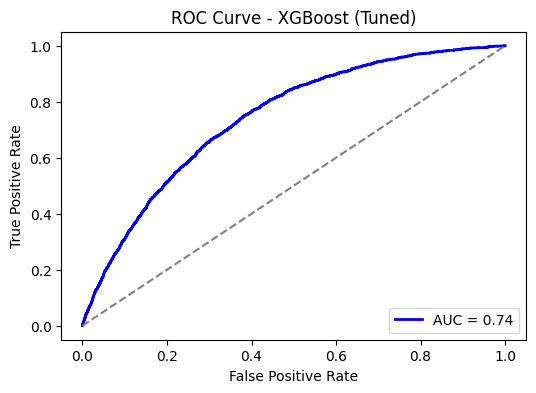

📌 Tuned XGBoost Accuracy: 0.7985
📌 Tuned XGBoost AUC-ROC Score: 0.7424

Classification Report - XGBoost (Tuned):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     12757
           1       0.34      0.37      0.35      2243

    accuracy                           0.80     15000
   macro avg       0.61      0.62      0.62     15000
weighted avg       0.81      0.80      0.80     15000



In [ ]:
# ✅ 5. Define Hyperparameter Grid for XGBoost
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0]
}

# ✅ 6. Perform Grid Search with Cross-Validation
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]), random_state=42)

grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring="roc_auc", n_jobs=-1, verbose=2)
grid_search.fit(X_train_smote, y_train_smote)

# ✅ 7. Train Final XGBoost Model with Best Parameters
best_params = grid_search.best_params_
print(f"📌 Best Hyperparameters: {best_params}")

xgb_best = xgb.XGBClassifier(**best_params, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]), random_state=42)
xgb_best.fit(X_train_smote, y_train_smote)

# ✅ 8. Model Evaluation
y_pred_xgb_best = xgb_best.predict(X_test)
y_pred_prob_xgb_best = xgb_best.predict_proba(X_test)[:, 1]

accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
roc_auc_xgb_best = roc_auc_score(y_test, y_pred_prob_xgb_best)
classification_rep_xgb_best = classification_report(y_test, y_pred_xgb_best)

# ✅ 9. Confusion Matrix
conf_matrix_xgb_best = confusion_matrix(y_test, y_pred_xgb_best)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.savefig("confusion_matrix_xgb_tuned.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 10. ROC Curve
fpr_xgb_best, tpr_xgb_best, _ = roc_curve(y_test, y_pred_prob_xgb_best)
roc_auc_xgb_best = auc(fpr_xgb_best, tpr_xgb_best)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb_best, tpr_xgb_best, color="blue", lw=2, label=f"AUC = {roc_auc_xgb_best:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost (Tuned)")
plt.legend(loc="lower right")
plt.savefig("roc_curve_xgb_tuned.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 11. Display Key Performance Metrics
print(f"📌 Tuned XGBoost Accuracy: {accuracy_xgb_best:.4f}")
print(f"📌 Tuned XGBoost AUC-ROC Score: {roc_auc_xgb_best:.4f}")
print("\nClassification Report - XGBoost (Tuned):\n", classification_rep_xgb_best)

In [ ]:

from sklearn.model_selection import StratifiedKFold, cross_val_score


# ✅ 3. Apply SMOTE to Balance the Dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# ✅ 4. Initialize XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.7,
    colsample_bytree=1.0,
    scale_pos_weight=len(y_smote[y_smote == 0]) / len(y_smote[y_smote == 1]),
    random_state=42
)

# ✅ 5. Perform Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute Cross-Validation Scores
accuracy_scores = cross_val_score(xgb_model, X_smote, y_smote, cv=cv, scoring="accuracy")
roc_auc_scores = cross_val_score(xgb_model, X_smote, y_smote, cv=cv, scoring="roc_auc")

# ✅ 6. Display Results
print(f"📌 Mean Accuracy (Cross-Validation): {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
print(f"📌 Mean AUC-ROC Score (Cross-Validation): {roc_auc_scores.mean():.4f} ± {roc_auc_scores.std():.4f}")


📌 Mean Accuracy (Cross-Validation): 0.8772 ± 0.0025
📌 Mean AUC-ROC Score (Cross-Validation): 0.9496 ± 0.0011


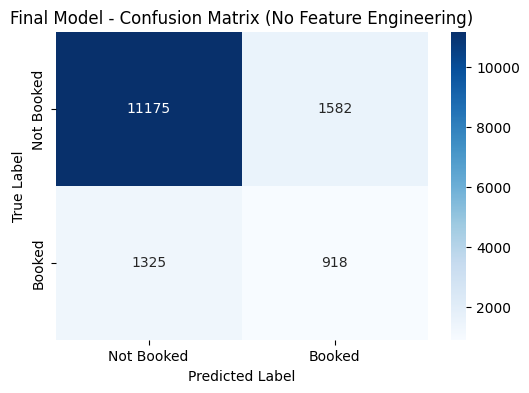

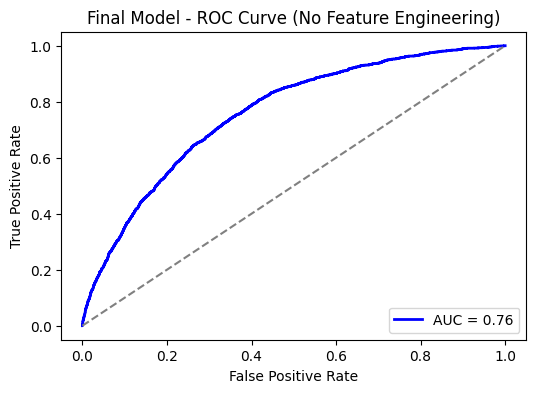

📌 Final Model Accuracy (No Feature Engineering): 0.8062
📌 Final Model AUC-ROC Score: 0.7576

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     12757
           1       0.37      0.41      0.39      2243

    accuracy                           0.81     15000
   macro avg       0.63      0.64      0.64     15000
weighted avg       0.82      0.81      0.81     15000



In [ ]:
import xgboost as xgb
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report


# ✅ 2. Define Features and Target
target = "booking_complete"
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# ✅ 3. Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ 4. Train the Final Model (No Feature Engineering)
final_xgb_model = xgb.XGBClassifier(
    n_estimators=500, learning_rate=0.1, max_depth=8, subsample=0.7, colsample_bytree=1.0,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42
)
final_xgb_model.fit(X_train, y_train)

# ✅ 5. Model Evaluation on Test Set
y_pred_final = final_xgb_model.predict(X_test)
y_pred_prob_final = final_xgb_model.predict_proba(X_test)[:, 1]

accuracy_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, y_pred_prob_final)
classification_rep_final = classification_report(y_test, y_pred_final)

# ✅ 6. Confusion Matrix for Final Model
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_final, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Final Model - Confusion Matrix (No Feature Engineering)")
plt.savefig("final_confusion_matrix_no_fe.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 7. ROC Curve for Final Model
fpr_final, tpr_final, _ = roc_curve(y_test, y_pred_prob_final)
roc_auc_final = auc(fpr_final, tpr_final)

plt.figure(figsize=(6, 4))
plt.plot(fpr_final, tpr_final, color="blue", lw=2, label=f"AUC = {roc_auc_final:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final Model - ROC Curve (No Feature Engineering)")
plt.legend(loc="lower right")
plt.savefig("final_roc_curve_no_fe.png", bbox_inches='tight', dpi=300)
plt.show()

# ✅ 9. Display Key Performance Metrics
print(f"📌 Final Model Accuracy (No Feature Engineering): {accuracy_final:.4f}")
print(f"📌 Final Model AUC-ROC Score: {roc_auc_final:.4f}")
print("\nClassification Report:\n", classification_rep_final)


<ipython-input-45-1678b297dee8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")


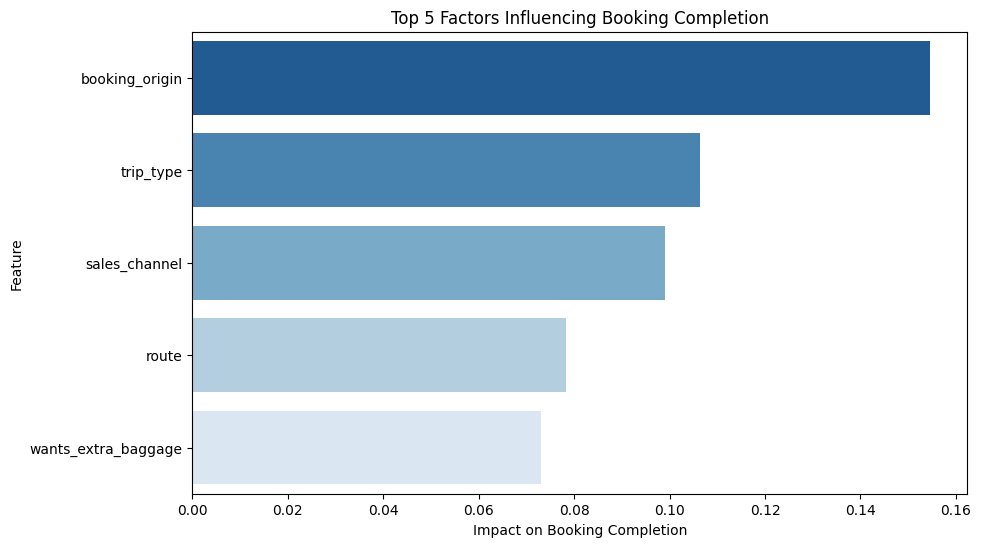

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load feature importance from trained XGBoost model
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": final_xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False).head(5)  # Show top 5 only for simplicity

# Plot Feature Importance
plt.figure(figsize=(7,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")
plt.xlabel("Impact on Booking Completion")
plt.ylabel("Feature")
plt.title("Top 5 Factors Influencing Booking Completion")
plt.savefig("final_feature_impact.png", bbox_inches='tight', dpi=300)
plt.show()


<ipython-input-46-01d3b9d9ef8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")


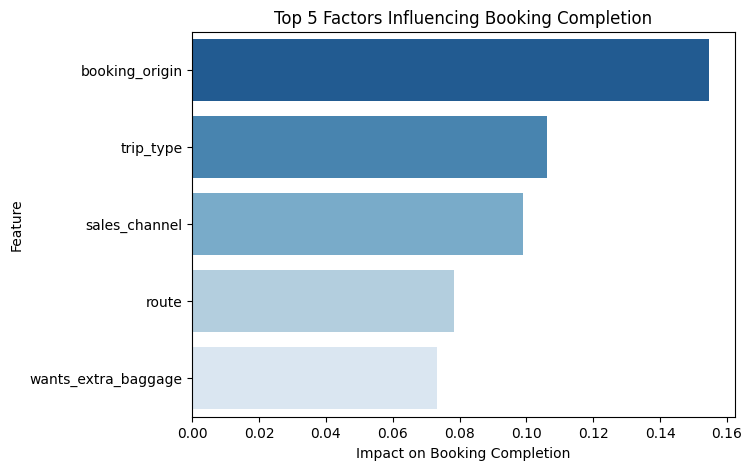

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(7,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")
plt.xlabel("Impact on Booking Completion")
plt.ylabel("Feature")
plt.title("Top 5 Factors Influencing Booking Completion")
plt.savefig("final_feature_impact.png", bbox_inches='tight', dpi=300)
plt.show()